In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/WilliamKesuma/William-0706022210040-Week6-Breast-Cancer-Dataset-dan-Adult-Income-Dataset/refs/heads/main/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#info mengenai data dataframe (nama kolom, tipe data, dll)
#describe mengenai dataframe (count, mean, standard dev, dll)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
#untuk mengubah format nama kolom concave points_mean (ada spasi) menjadi concave_points_mean (menjadi _ )
df.columns = df.columns.str.replace(" ", "_")

#untuk menampilkan jumlah / frekuensi kemunculan setiap nilai unik di setiap kolom dalam dataframe
columns = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
    "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for id:
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64


Value counts for diagnosis:
B    357
M    212
Name: diagnosis, dtype: int64


Value counts for radius_mean:
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64


Value counts for texture_mean:
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64


Value counts for perimeter_mean:
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64


Value counts for area_mean:
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4  

In [5]:
#mengecheck null value 
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

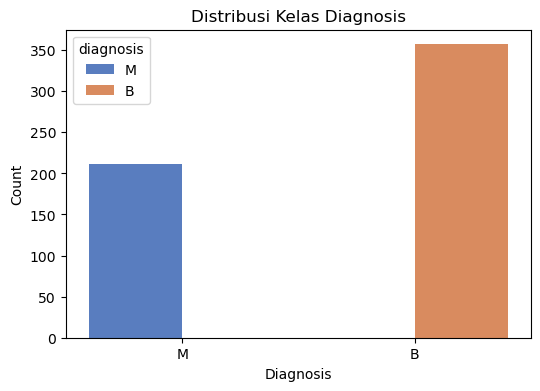

In [13]:
#visualisasi
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='muted')
plt.title('Distribusi Kelas Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

- M: yang merepresentasikan "Malignant" (ganas)
- B: yang merepresentasikan "Benign" (jinak)

Dari grafik tersebut terlihat bahwa jumlah kasus yang terdiagnosis “jinak” (B) lebih banyak dibandingkan dengan jumlah kasus yang terdiagnosis “ganas” (M). Terdapat lebih dari 350 kasus pada kelas “jinak” dan sekitar 200 kasus pada kelas “ganas”.

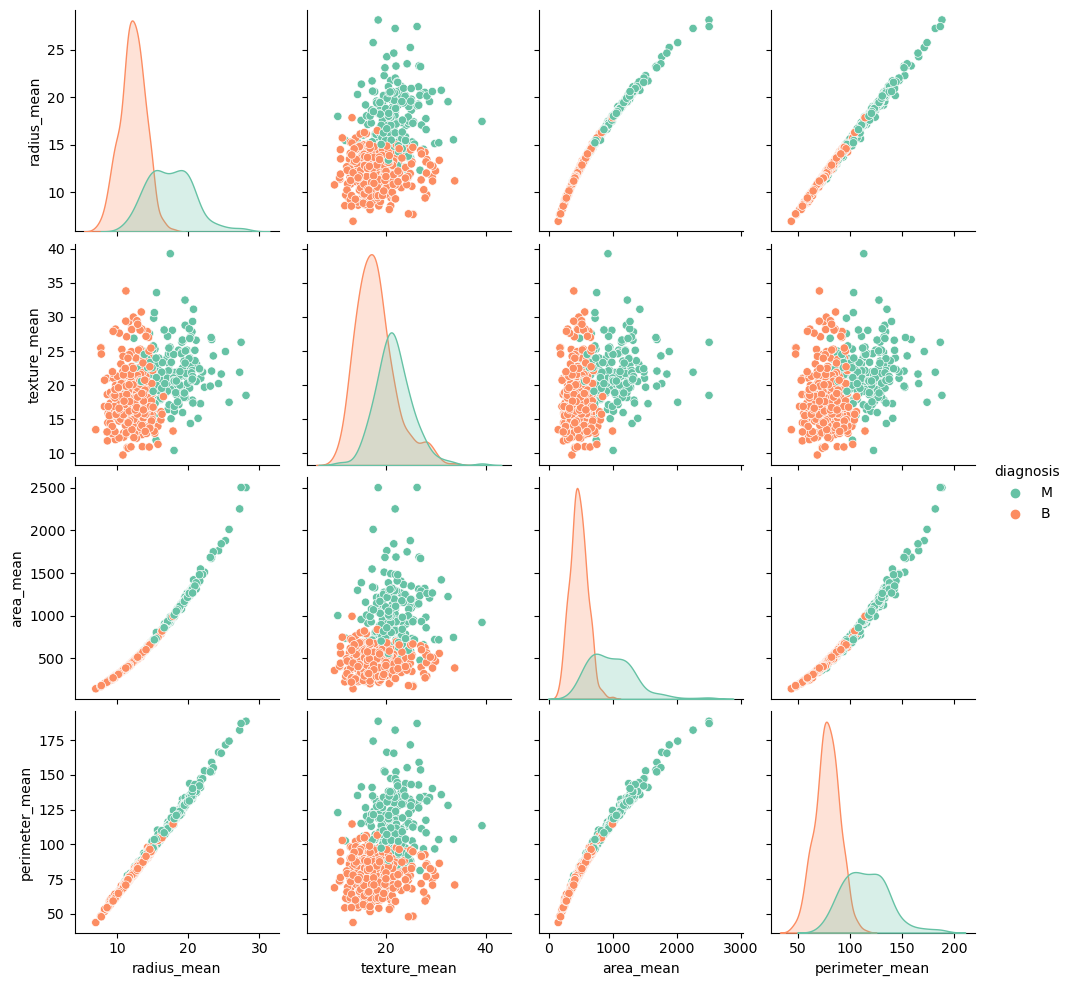

In [14]:
# visualisasi hubungan antar fitur
subset = df[['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'diagnosis']]
sns.pairplot(subset, hue='diagnosis', diag_kind='kde', palette='Set2')
plt.show()


Visualisasi pairplot di atas memperlihatkan hubungan antara variabel statistik seperti radius_mean, texture_mean, area_mean, dan perimeter_mean dalam dataset. Kategori diagnosis yang berbeda ditandai dengan warna yang berbeda pula, yaitu hijau untuk kategori M (ganas) dan oranye untuk kategori B (jinak).

Setiap titik dalam scatter plot mewakili sebagian data, sedangkan pada plot diagonal ditampilkan distribusi setiap variabel berdasarkan diagnosisnya. Dari visualisasi ini, terlihat bahwa kategori M (ganas) cenderung memiliki nilai yang lebih tinggi dibandingkan kategori B (jinak) pada semua variabel. Selain itu, terdapat korelasi kuat antara radius_mean, area_mean, dan perimeter_mean, terlihat dari pola diagonal yang padat di antara ketiga variabel tersebut.

In [15]:
#untuk mengubah kolom categorical (diagnosis) menjadi numeric
diagnosis = {'M': 0, 'B': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
392,903507,0,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,...,21.20,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190
482,912519,1,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326
244,884180,0,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.08886,...,21.65,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
520,917092,1,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,...,10.57,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
322,894855,1,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553
421,906564,1,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
354,901011,1,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,...,12.12,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018
275,8911164,1,11.890,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,...,12.40,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033
194,87556202,0,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701
413,905557,1,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,...,16.76,31.55,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251


In [16]:
#untuk menampilkan nilai unik dari target variabel di dalam dataframe
print(f"Nilai unik untuk diagnosis:")
print(df["diagnosis"].unique())

Nilai unik untuk diagnosis:
[0 1]


# Machine Learning

In [17]:
#memisahkan variabel independen (X) dari target variabel dependen (y) dalam persiapan untuk model machine learning
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
     

#split data untuk training dan test set (test size 20% and random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

#cek banyak kolom dan baris pada data X_train dan X_test
X_train.shape, X_test.shape

((455, 31), (114, 31))

# Desicion Tree Entropy

In [18]:
#membuat dan melatih model Decision Tree dengan menggunakan metode Entropy untuk model klasifikasinya lalu membatasinya hingga maksimal tiga tingkat (max_depth = 3)
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)
     
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [19]:
#Untuk membuat prediksi menggunakan model Decision Tree dengan metode Entropy yang sudah dilatih sebelumnya
y_pred_en = clf_en.predict(X_test)
     
#accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

#Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))

#Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))     

Model accuracy score with criterion entropy: 0.9649
Training set score: 0.9802
Test set score: 0.9649


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [16, 266]'),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [5, 258]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [3, 257]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [153, 20]'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994\nsamples = 44\nvalue = [24, 20]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.454\n

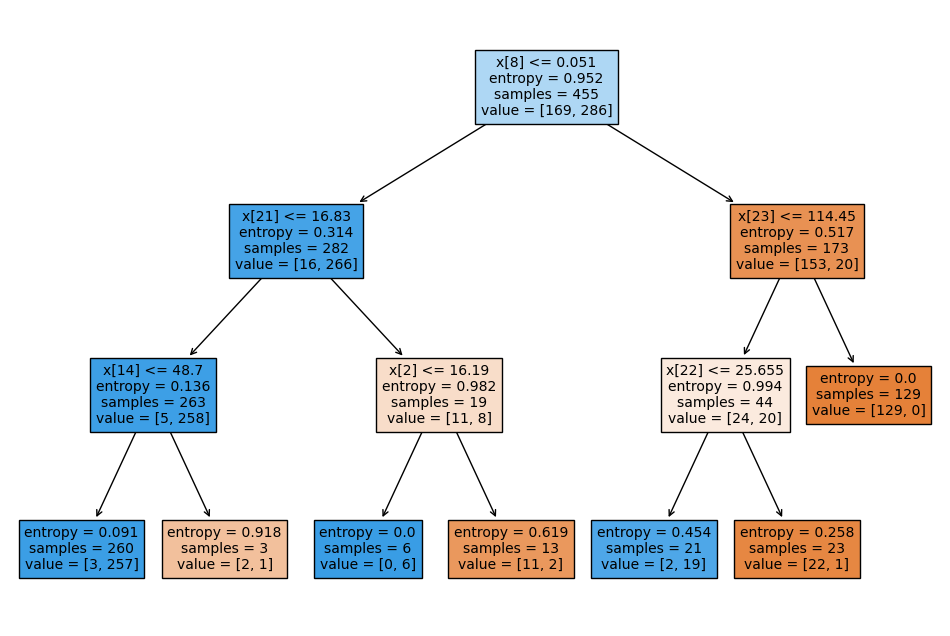

In [20]:
#Untuk menampilkan visualisasi pohon keputusan yang dilatih menggunakan Decision Tree dengan metode Gini
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

In [22]:
#membuat dan melatih model Decision Tree dengan menggunakan metode Gini untuk model klasifikasinya lalu membatasinya hingga maksimal tiga tingkat (max_depth = 3)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
y_pred_gini = clf_gini.predict(X_test)
     
#accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

#Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))

#Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

Model accuracy score with criterion gini index: 0.9474
Training set score: 0.9780
Test set score: 0.9474


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'x[17] <= 0.136\ngini = 0.029\nsamples = 138\nvalue = [136, 2]')

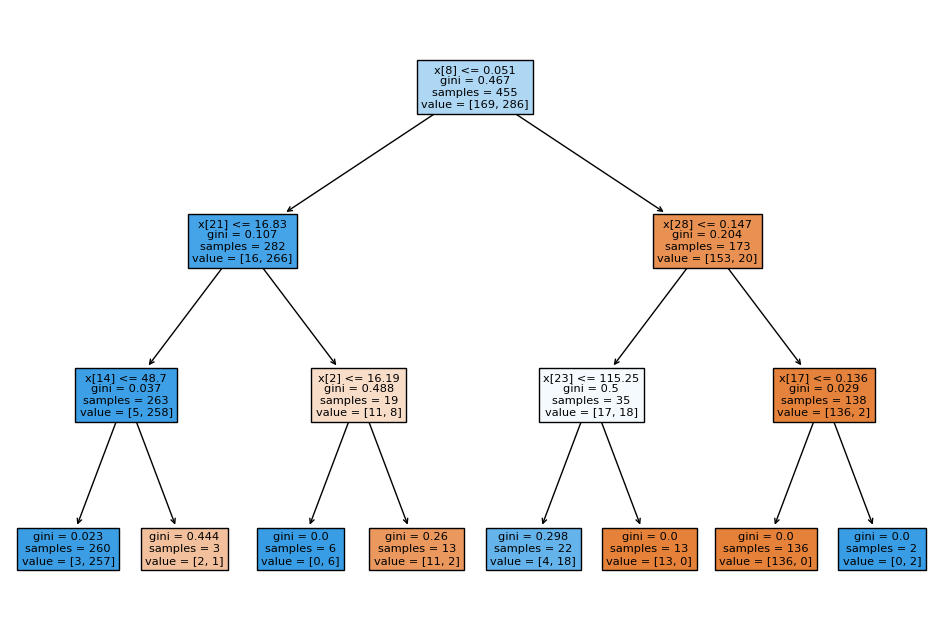

In [24]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

In [26]:
#untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari dua model klasifikasi yang berbeda
#yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
gini = confusion_matrix(y_test, y_pred_gini)
entropi = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix gini index: \n', gini)
print('Confusion matrix entropy: \n', entropi)

Confusion matrix gini index: 
 [[39  4]
 [ 2 69]]
Confusion matrix entropy: 
 [[39  4]
 [ 0 71]]


In [27]:
#untuk mencetak laporan klasifikasi (classification report) dari dua model klasifikasi yang berbeda
#yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report Entropy
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Kesimpulan:

**Akurasi Model:** Akurasi model dengan kriteria Entropy (0,9649) sedikit lebih tinggi dibandingkan dengan indeks Gini (0,9474), yang menunjukkan bahwa kriteria Entropy memberikan prediksi yang lebih akurat pada data pengujian.

**Nilai Training Set Score:** Skor pelatihan untuk kedua model sangat mirip, dengan Entropy mencapai 0,9802 dan Gini 0,9780, yang menunjukkan bahwa kedua model berhasil mengenali pola dalam data pelatihan.

**Confusion Matrix:** Pada kriteria Entropy, model berhasil mengklasifikasikan semua sampel kelas 1 dengan benar, sedangkan pada kriteria Gini, terdapat dua kesalahan di mana sampel kelas 1 diklasifikasikan sebagai kelas 0.

**Classification Report:** Presisi, recall, dan skor F1 kedua model berada pada level tinggi untuk kedua kelas. Namun, rata-rata skor F1 untuk semua kelas menunjukkan kinerja Entropy yang sedikit lebih unggul.

Kesimpulannya, model Decision Tree dengan kriteria Entropy menunjukkan hasil yang sedikit lebih baik dibandingkan dengan kriteria Gini dari segi akurasi dan metrik performa lainnya.

# Naive Bayes

In [28]:
#membuat dan melatih model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
#untuk membuat prediksi menggunakan model Naive Bayes yang sudah dilatih sebelumnya
nb_y_pred = nb_classifier.predict(X_test)

#accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Accuracy Score with GaussianNB: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

#Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))

#Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

Accuracy Score with GaussianNB: 0.6140
Training set score: 0.6286
Test set score: 0.6140


In [31]:
#untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model klasifikasi Naive Bayes
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

#untuk mencetak laporan klasifikasi (classification report) dari model klasifikasi Naive Bayes
print('\nClassification Report GaussianNB:')
print(classification_report(y_test, nb_y_pred))

Confusion matrix GaussianNB: 
 [[ 0 43]
 [ 1 70]]

Classification Report GaussianNB:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      0.99      0.76        71

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [32]:
#alasan saya menggunakan Logistic Regression karena dapat memberikan probabilitas prediksi untuk setiap kelas.
#membuat dan melatih model Logistic Regression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [33]:
#untuk membuat prediksi menggunakan model Logistic Regression yang sudah dilatih sebelumnya
y_pred_log = classifier.predict(X_test)

#accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with Logistic Regression: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

#Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}'.format(classifier.score(X_train, y_train)))

#Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}'.format(classifier.score(X_test, y_test)))

Model accuracy score with Logistic Regression: 0.6228
Training set score: 0.6286
Test set score: 0.6228


In [34]:
#untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred_log)
print('Confusion matrix Logistic Regression:\n', lr_cm)

#untuk mencetak laporan klasifikasi (classification report) dari model Logistic Regression
print('\nClassification Report Logistic Regression:')
print(classification_report(y_test, y_pred_log))

Confusion matrix Logistic Regression:
 [[ 0 43]
 [ 0 71]]

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kesimpulan:

Decision Tree (Entropy): Model dengan kriteria Entropy mencapai akurasi 96,49% dan memiliki recall tinggi, khususnya pada kelas 1. Model ini menunjukkan performa yang baik, dengan hampir semua prediksi untuk kelas 1 yang akurat.

Naive Bayes: Model ini memiliki akurasi terendah, yaitu 61,40%, dan performanya sangat lemah pada kelas 0, di mana semua prediksi tidak akurat. Model ini tidak efektif dan tidak cocok digunakan untuk dataset ini.

Logistic Regression: Model ini memiliki akurasi tertinggi kedua (95,61%) setelah Entropy, dengan performa yang kuat dan mendekati model Entropy. Presisi dan recall untuk kedua kelas juga tinggi dan seimbang.

Secara keseluruhan, model Decision Tree dengan kriteria Entropy memberikan hasil yang sangat baik, sementara Naive Bayes memiliki hasil yang kurang memuaskan dan tidak efektif. Model Entropy sedikit lebih unggul dibandingkan Logistic Regression dalam akurasi dan performa untuk kelas 0.